In [1]:
import cv2
import os
import csv
import sys
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
dir_folder = '/home/hongyu2/project/hackathon2/UR/processed_dataset_win20_thre18_3'
W, H = 224, 224 
random_name_list = list(range(100000))
falls_labels = 'urfall-cam0-falls.csv'
#notfalls_labels = 'urfall-cam0-adls.csv'
if not os.path.isdir(dir_folder):
    os.mkdir(dir_folder)
if not os.path.isdir(dir_folder + '/fall/'):
    os.mkdir(dir_folder + '/fall/')
if not os.path.isdir(dir_folder + '/nofall/'):
    os.mkdir(dir_folder + '/nofall/')
        
WLEN = 20
THRE = 20-18

In [ ]:
from collections import defaultdict
label_saver = defaultdict(list)

In [ ]:
with open(falls_labels) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        label_saver[row[0]].append(abs(int(row[2]))^1) 

In [ ]:
def frames_gen(video_path, dir_folder, labels, window_len=10, threshold=5):
    file_list = glob.glob(video_path + '/*.png')
    #file_list = glob.glob('/home/hongyu2/project/hackathon2/UR/dataset_1/fall-01-cam0-rgb/*.png')
    key_for_label = video_path.split('/')[-1][:7]
    tmp_label_video = labels[key_for_label]
    file_list = sorted(file_list, key=lambda a: int(a[-7:-4]))
    n = len(file_list)
    nofall_folder = dir_folder + '/nofall/'
    fall_folder = dir_folder + '/fall/'
    for start_idx in range(0, n, window_len):
        if start_idx + window_len <= (n-1):
            if_fall = False if sum(tmp_label_video[start_idx:start_idx + window_len]) < threshold else True
            tmp_one_sample = np.zeros([window_len, W, H, 3]) 
            for i in range(start_idx, start_idx+window_len):
                img_in = cv2.imread(file_list[i])
                img_in = cv2.resize(img_in, (W,H))
                tmp_one_sample[i%window_len] = img_in
            #print(tmp_one_sample.shape)
            if if_fall:
                np.save(fall_folder + str(random_name_list.pop(0)) + '.npy', tmp_one_sample)
            else:
                np.save(nofall_folder + str(random_name_list.pop(0)) + '.npy', tmp_one_sample)
                
                
    
    
    

In [ ]:
video_path = glob.glob('/home/hongyu2/project/hackathon2/UR/dataset_1/fall*')

In [ ]:
for i, path in enumerate(video_path):
    frames_gen(path, dir_folder, labels=label_saver, window_len=WLEN, threshold=THRE)

In [ ]:
def frames_gen_nofall(video_dal_path, dir_folder, window_len=10, threshold=5):
    file_list = glob.glob(video_dal_path + '/*.png')
    #file_list = glob.glob('/home/hongyu2/project/hackathon2/UR/dataset_1/fall-01-cam0-rgb/*.png')
    file_list = sorted(file_list, key=lambda a: int(a[-7:-4]))
    n = len(file_list)
    nofall_folder = dir_folder + '/nofall/'
    for start_idx in range(0, n, window_len):
        if start_idx + window_len <= (n-1):
            tmp_one_sample = np.zeros([window_len, W, H, 3])
            for i in range(start_idx, start_idx+window_len):
                img_in = cv2.imread(file_list[i])
                img_in = cv2.resize(img_in, (W,H))
                tmp_one_sample[i%window_len] = img_in

            np.save(nofall_folder + str(random_name_list.pop(0)) + '.npy', tmp_one_sample)


In [ ]:
video_nofall_path = glob.glob('/home/hongyu2/project/hackathon2/UR/dataset_1/adl*')

In [ ]:
for path in video_nofall_path:
    frames_gen_nofall(path, dir_folder, window_len=WLEN, threshold=THRE)

In [ ]:
import os
from os import listdir
from os.path import isfile, join
videopath = "Videos"
outputpath = "out"
#files in the Annotation directory
#cuts = {videoname: (start, end) ), start&end in seconds
cuts = {}
onlyfiles = [f for f in listdir(videopath) if isfile(join(videopath, f))]
index = 0
for vid in onlyfiles:
    start,end = cuts[vid]
    start = str(float("{0:.1f}".format(float(start))))
    end = str(float("{0:.1f}".format(float(end))))
    escapedname = vid
    escapechar = []
    for i in range(len(escapedname)):
        if(escapedname[i] in [' ','(',')']):
            escapechar += [i]
    offset = 0
    for i in escapechar:
        escapedname = escapedname[:i+offset] + '\\' + escapedname[i+offset:]
        offset+=1
    os.system('cd '+videopath+' && ffmpeg -i '+escapedname+' -ss 00:00:'+start+' -t 00:00:'+end+' '+outputpath+'/o_'+escapedname)
    index+=1


In [ ]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
img_in = cv2.imread('/home/hongyu2/project/hackathon2/UR/dataset_1/fall-01-cam0-rgb/fall-01-cam0-rgb-001.png')

In [ ]:
plt.imshow(cv2.resize(img_in, (W,H)))

In [18]:
# read marker file
import io
from collections import defaultdict
cuts = defaultdict(list)
with io.open("falling_period.csv", mode="r", encoding="utf-8") as f:
    for fi in f:
        #print(fi)
        tmp = fi.split(',')
        if tmp[0].isdigit():
            if tmp[0] != '4' and tmp[0] != '23':
                cuts[tmp[0]] = [int(tmp[2]), int(tmp[3]), int(tmp[1])]
            else:
                cuts[tmp[0]] = [int(tmp[2]), int(tmp[3]), int(tmp[1]), int(tmp[4]), int(tmp[5])]
                 

In [19]:
cuts

defaultdict(list,
            {'1': [1080, 1108, 1562],
             '10': [512, 530, 933],
             '11': [464, 489, 822],
             '12': [605, 653, 937],
             '13': [823, 863, 1206],
             '14': [989, 1023, 1499],
             '15': [755, 787, 1086],
             '16': [891, 940, 1234],
             '17': [730, 770, 1539],
             '18': [571, 601, 1001],
             '19': [499, 600, 1016],
             '2': [375, 399, 831],
             '20': [545, 672, 1008],
             '21': [864, 901, 1207],
             '22': [767, 808, 1109],
             '23': [1520, 1595, 5381, 3574, 3614],
             '24': [0, 0, 1008],
             '3': [591, 625, 939],
             '4': [288, 314, 1049, 601, 638],
             '5': [311, 336, 767],
             '6': [583, 629, 1256],
             '7': [476, 507, 926],
             '8': [271, 298, 713],
             '9': [628, 651, 943]})

In [38]:
WIN = 20
THRE = int(20*0.6)
camera_index = 'cam7.avi' # enssentially we only need one folder
random_name_list = list(range(1000000))
parent_folder = '/home/hongyu2/project/hackathon2/MCFA/numpys'
scene_folder = glob.glob(parent_folder + '/chute*')
dest_folder = parent_folder + '/Out_win{}_thre{}_cam7_flow_3'.format(WIN, THRE)
# if not os.path.isdir(dest_folder):
#     os.mkdir(dest_folder)
# nofall_path = os.path.join(dest_folder, 'nofall')
# fall_path = os.path.join(dest_folder, 'fall')
# if not os.path.isdir(nofall_path):
#     os.mkdir(nofall_path)
# if not os.path.isdir(fall_path):
#     os.mkdir(fall_path)
dir_folder = dest_folder
train_fall = dir_folder + '/train' + '/fall/'
train_nofall = dir_folder + '/train' + '/nofall/'
test_fall = dir_folder + '/test' + '/fall/'
test_nofall = dir_folder + '/test' + '/nofall/'

dir_folder = dest_folder
if not os.path.isdir(dir_folder):
    os.mkdir(dir_folder)
if not os.path.isdir(dir_folder + '/train'):
    os.mkdir(dir_folder + '/train')
if not os.path.isdir(dir_folder + '/test'):
    os.mkdir(dir_folder + '/test')
if not os.path.isdir(dir_folder + '/train' + '/fall/'):
    os.mkdir(dir_folder + '/train' + '/fall/')
if not os.path.isdir(dir_folder + '/test' + '/fall/'):
    os.mkdir(dir_folder + '/test' + '/fall/')
if not os.path.isdir(dir_folder + '/train' + '/nofall/'):
    os.mkdir(dir_folder + '/train' + '/nofall/')
if not os.path.isdir(dir_folder + '/test' + '/nofall/'):
    os.mkdir(dir_folder + '/test' + '/nofall/')

In [ ]:
# for optical flow
import numpy as np
def npy2array(foldername, start_idx, end_idx):
    stacked = np.zeros((end_idx-start_idx,224,224,3))
    cnt =0
    for i in range(start_idx, end_idx):
        stacked[cnt,:,:,:] = np.load(foldername+'/opticalhsv%d.npy'%i)
        cnt+=1
    return stacked

In [39]:
import numpy as np
def npy2array(foldername, start_idx, end_idx):
    stacked = np.zeros((end_idx-start_idx,224,224,3))
    cnt =0
    for i in range(start_idx, end_idx):
        stacked[cnt,...] = np.load(foldername+'/frame%d.npy'%i)
        cnt+=1
    return stacked

In [40]:
import random
all_index = list(range(0,len(scene_folder)))
random.shuffle(all_index)
train_index= all_index[:int(len(all_index)*0.8)]
test_index = all_index[int(len(all_index)*0.8):]

In [41]:
for i, scene in enumerate(scene_folder):
    data_path = os.path.join(scene, camera_index)
    if i in train_index:
        fall_path = train_fall 
        nofall_path = train_nofall
    else:
        fall_path = test_fall
        nofall_path = test_nofall
    scene_index = str(int(data_path.split('/')[-2][-2:]))
    index_set = cuts[scene_index]
    if len(index_set) == 3:
        start, end, last = index_set
        print(start, end, last)
        for i in range(0, last, WIN):

            if (i+WIN) < last:
#                 print(i <= (end-THRE) and (i+WIN) >= (start+THRE))
#                 print((i+WIN) < start or i > end)
#                 print('~'*20)
                try:
                    if (i <= (end-THRE) and i >= (start+THRE//2)) or (i<start and (i+WIN)>end):
                        print(i, i+WIN)
                        out_data = npy2array(data_path, start_idx=i, end_idx=i+WIN)
                        np.save(fall_path + '/' + str(random_name_list.pop()) + '.npy', out_data)
                    elif ((i+WIN) < start and i < start) or (i > end and (i+WIN) > end):
                        out_data = npy2array(data_path, start_idx=i, end_idx=i+WIN)
                        np.save(nofall_path + '/' + str(random_name_list.pop()) + '.npy', out_data)
                        
                except:
                    continue
#     elif len(index_set) == 5:
#         start, end, last, start1, end1 = index_set
#         for i in range(0, last, WIN):
#             if (i+WIN) < last:
#                 if (i <= (end-THRE) and (i+WIN) >= (start+THRE)) or (i <= (end1-THRE) and (i+WIN) >= (start1+THRE)):
#                     out_data = npy2array(data_path, start_idx=i, end_idx=i+WIN)
#                     np.save(fall_path + '/' + str(random_name_list.pop()) + '.npy', out_data)
#                 elif (i+WIN) < start or (i > end and (i+WIN) < start1) or i > end1:
#                     out_data = npy2array(data_path, start_idx=i, end_idx=i+WIN)
#                     np.save(nofall_path + '/' + str(random_name_list.pop()) + '.npy', out_data)


    

476 507 926
571 601 1001
580 600
755 787 1086
767 808 1109
780 800
311 336 767
320 340
989 1023 1499
1000 1020
628 651 943
499 600 1016
520 540
540 560
560 580
580 600
891 940 1234
900 920
920 940
0 0 1008
1080 1108 1562
464 489 822
823 863 1206
840 860
375 399 831
605 653 937
620 640
640 660
864 901 1207
880 900
512 530 933
730 770 1539
740 760
591 625 939
600 620
545 672 1008
560 580
580 600
600 620
620 640
640 660
660 680
583 629 1256
600 620
271 298 713
280 300


In [43]:
data_path = '/home/hongyu2/project/hackathon2/MCFA/numpys/Out_win20_thre12_cam7_flow_3/'

import glob

train_falls = []
for file in glob.glob(data_path+"train/fall/*.npy"):
    train_falls.append(file)
    

train_no_falls = []
for file in glob.glob(data_path+"train/nofall/*.npy"):
    train_no_falls.append(file)
    
test_falls = []
for file in glob.glob(data_path+"test/fall/*.npy"):
    test_falls.append(file)
    

test_no_falls = []
for file in glob.glob(data_path+"test/nofall/*.npy"):
    test_no_falls.append(file)

print(len(train_falls)); print(len(train_no_falls)); print(len(test_falls)); print(len(test_no_falls))

12
858
12
233


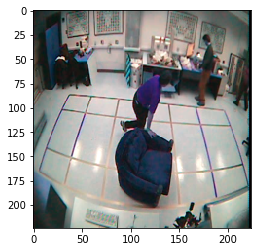

In [110]:
i=4
f = test_no_falls[i]
test_sample = np.load(f)
test_sample = np.expand_dims(test_sample, axis=0)

frame=19
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.imshow(test_sample[0,frame,:,:,:].astype('int'))

In [ ]:
glob.glob(data_path+"train/fall/*.npy")

In [ ]:
data_path